# Preparing a Librespeech Dataloader

This notebook implements a dataloader for the Librespeech dataset.

In [21]:
import os
import pathlib
from pathlib import Path
from pyprojroot import here
from torch.utils.data import Dataset

import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
! ls ../data/LibriSpeech/dev-clean/*/*/*.trans.txt | head -n 1 | xargs cat

1272-128104-0000 MISTER QUILTER IS THE APOSTLE OF THE MIDDLE CLASSES AND WE ARE GLAD TO WELCOME HIS GOSPEL
1272-128104-0001 NOR IS MISTER QUILTER'S MANNER LESS INTERESTING THAN HIS MATTER
1272-128104-0002 HE TELLS US THAT AT THIS FESTIVE SEASON OF THE YEAR WITH CHRISTMAS AND ROAST BEEF LOOMING BEFORE US SIMILES DRAWN FROM EATING AND ITS RESULTS OCCUR MOST READILY TO THE MIND
1272-128104-0003 HE HAS GRAVE DOUBTS WHETHER SIR FREDERICK LEIGHTON'S WORK IS REALLY GREEK AFTER ALL AND CAN DISCOVER IN IT BUT LITTLE OF ROCKY ITHACA
1272-128104-0004 LINNELL'S PICTURES ARE A SORT OF UP GUARDS AND AT EM PAINTINGS AND MASON'S EXQUISITE IDYLLS ARE AS NATIONAL AS A JINGO POEM MISTER BIRKET FOSTER'S LANDSCAPES SMILE AT ONE MUCH IN THE SAME WAY THAT MISTER CARKER USED TO FLASH HIS TEETH AND MISTER JOHN COLLIER GIVES HIS SITTER A CHEERFUL SLAP ON THE BACK BEFORE HE SAYS LIKE A SHAMPOOER IN A TURKISH BATH NEXT MAN
1272-128104-0005 IT IS OBVIOUSLY UNNECESSARY FOR US TO POINT OUT HOW LUMINOUS THESE CRITICI

In [3]:
dataset_dir = here('data/LibriSpeech/dev-clean')
transcripts = []
for txt_file in Path(dataset_dir).glob('*/*/*.trans.txt'):
    with open(txt_file, 'r') as f:
        for line in f.readlines():
            audio_id, transcript = line.split(' ', 1)
            transcripts.append({
                'audio_id': audio_id,
                'transcript': transcript.strip(),
                'audio_file': txt_file.parent / (audio_id + '.flac')
            })
df = pd.DataFrame(transcripts)
df

,audio_id,transcript,audio_file
0,2035-147960-0000,SHE WAS FOUR YEARS OLDER THAN I TO BE SURE AND...,/code/data/LibriSpeech/dev-clean/2035/147960/2...
1,2035-147960-0001,THIS CHANGE CAME ABOUT FROM AN ADVENTURE WE HA...,/code/data/LibriSpeech/dev-clean/2035/147960/2...
2,2035-147960-0002,ONE DAY WHEN I RODE OVER TO THE SHIMERDAS I FO...,/code/data/LibriSpeech/dev-clean/2035/147960/2...
3,2035-147960-0003,THERE HAD BEEN ANOTHER BLACK FROST THE NIGHT B...,/code/data/LibriSpeech/dev-clean/2035/147960/2...
4,2035-147960-0004,IT WAS ON ONE OF THESE GRAVEL BEDS THAT I MET ...,/code/data/LibriSpeech/dev-clean/2035/147960/2...
...,...,...,...
2698,2412-153948-0011,SO LONELY AND SO SOLEMN WITH THE SAD GREY CLOU...,/code/data/LibriSpeech/dev-clean/2412/153948/2...
2699,2412-153948-0012,EACH MUST CRY LOUDER AND WANDER FARTHER YET MA...,/code/data/LibriSpeech/dev-clean/2412/153948/2...
2700,2412-153948-0013,I HAD NO MONEY BUT IF I COULD ONLY FIND WORKAB...,/code/data/LibriSpeech/dev-clean/2412/153948/2...
2701,2412-153948-0014,THERE WAS NO ONE IN THE WHOLE WORLD WHO HAD TH...,/code/data/LibriSpeech/dev-clean/2412/153948/2...


In [6]:
idx = 0
audio, sample_rate = librosa.load(df.loc[idx, 'audio_file'])

In [18]:
import librosa.display

In [22]:
librosa.power_to_db(audio, ref=np.max)

array([-80., -80., -80., ..., -80., -80., -80.], dtype=float32)

In [26]:
spectrogram = librosa.feature.melspectrogram(y=audio, sr=sample_rate, n_mels=128, fmax=8000)

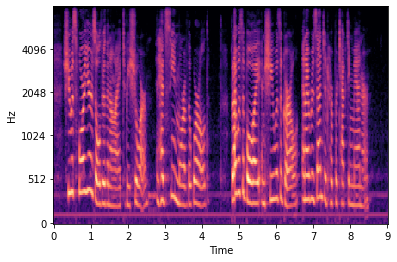

In [29]:
# Display spectrogram
librosa.display.specshow(
    librosa.power_to_db(spectrogram, ref=np.max),
    x_axis='time', y_axis='mel', fmax=8000
)

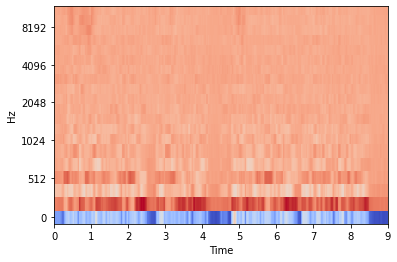

In [38]:
# Display mfccs
librosa.display.specshow(
    librosa.feature.mfcc(y=audio, sr=sample_rate),
    x_axis='time', y_axis='mel'
)

In [ ]:
class LibreSpeechDataset(Dataset):
    
    def __init__(self, directory):
        self.directory = Path(directory)
    
    
    def __len__(self):
        return len(list(self.directory.glob('*/*/*.flac')))

    def __getitem__(self, idx):
        pass